
# IQR method

Trying very high numbers for the IQR threshold seems to catch most.


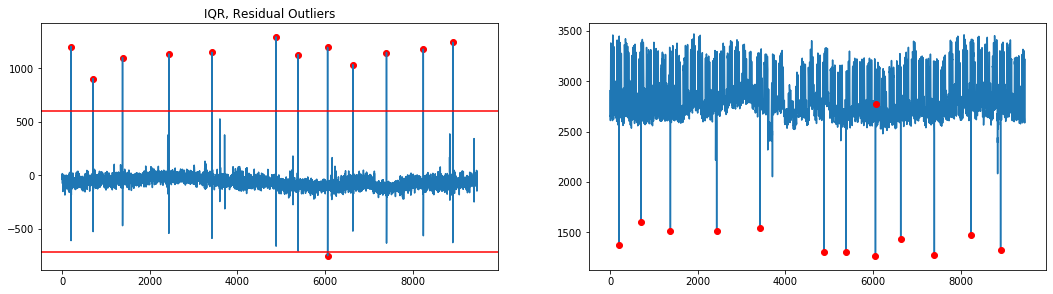

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\ejgoldbe\Downloads\for_emma.csv")
resids = df.Result
twenty_fifth = np.percentile(resids, 25)
seventy_fifth = np.percentile(resids, 75)
iqr = seventy_fifth - twenty_fifth
upper_bound = seventy_fifth + (10.0 * iqr)
lower_bound = twenty_fifth - (10.0 * iqr)
plt.figure(figsize = (18, 10))
plt.subplot(2, 2, 1)
plt.plot(resids.index, resids.values)
plt.axhline(y = upper_bound, color = 'red')
plt.axhline(y = lower_bound, color = 'red')

index_outliers = [i for i in range(len(resids)) if resids.values.tolist()[i] > upper_bound or resids.values.tolist()[i]
                  < lower_bound]
resid_outliers = resids.iloc[index_outliers]
plt.scatter(resid_outliers.index, resid_outliers.values, color = 'red')
plt.title("IQR, Residual Outliers")

plt.subplot(2, 2, 2)
actual = df.Actual
plt.plot(actual.index, actual.values, zorder=1)
actual_outliers = actual.iloc[index_outliers]
plt.scatter(actual_outliers.index, actual_outliers.values, color = 'red', zorder=2)
threshold = actual_outliers.sort_values(ascending=False).values[1]
print("Trying very high numbers for the IQR threshold seems to catch most.")

# Standard Deviation

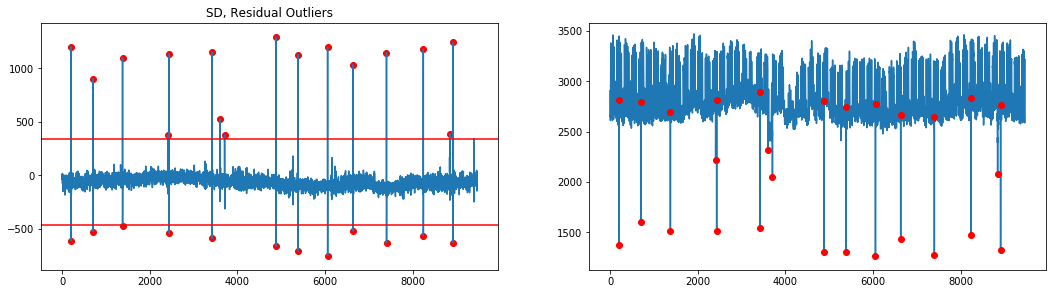

In [41]:
upper_sd = np.mean(resids) + 6*np.std(resids)
lower_sd = np.mean(resids) - 6*np.std(resids)
plt.figure(figsize = (18, 10))
plt.subplot(2, 2, 1)
plt.plot(resids.index, resids.values)
plt.axhline(y = upper_sd, color = 'red')
plt.axhline(y = lower_sd, color = 'red')
index_outliers = [i for i in range(len(resids)) if resids.values.tolist()[i] > upper_sd or resids.values.tolist()[i]
                  < lower_sd]
resid_outliers = resids.iloc[index_outliers]
plt.scatter(resid_outliers.index, resid_outliers.values, color = 'red')
plt.title("SD, Residual Outliers")

plt.subplot(2, 2, 2)
actual = df.Actual
plt.plot(actual.index, actual.values, zorder=1)
actual_outliers = actual.iloc[index_outliers]
plt.scatter(actual_outliers.index, actual_outliers.values, color = 'red', zorder=2)

143.71463296689495

# Standard Deviation W/Squared

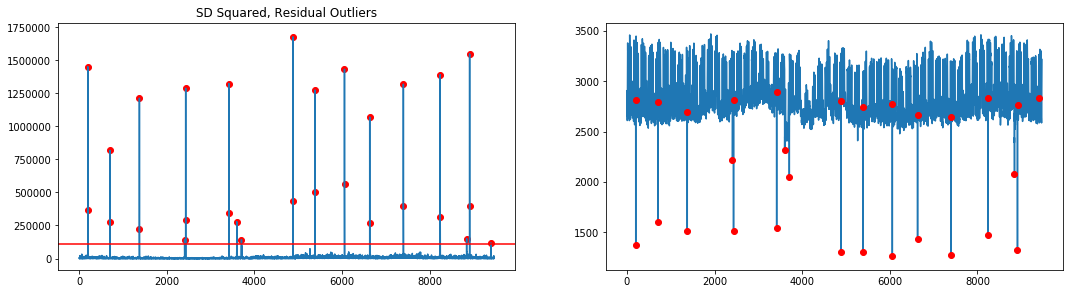

In [54]:
resids_squared = resids**2
plt.figure(figsize = (18, 10))
plt.subplot(2, 2, 1)
plt.plot(resids_squared.index, resids_squared.values)
sd_bound = np.mean(resids_squared) + 2*np.std(resids_squared)
plt.axhline(y = sd_bound, color = 'red')
index_outliers = [i for i in range(len(resids_squared)) if resids_squared.values.tolist()[i] > sd_bound]
resid_outliers = resids_squared.iloc[index_outliers]
plt.scatter(resid_outliers.index, resid_outliers.values, color = 'red')
plt.title("SD Squared, Residual Outliers")
len(resid_outliers)

plt.subplot(2, 2, 2)
actual = df.Actual
plt.plot(actual.index, actual.values, zorder=1)
actual_outliers = actual.iloc[index_outliers]
plt.scatter(actual_outliers.index, actual_outliers.values, color = 'red', zorder=2)


# IQR + Squared

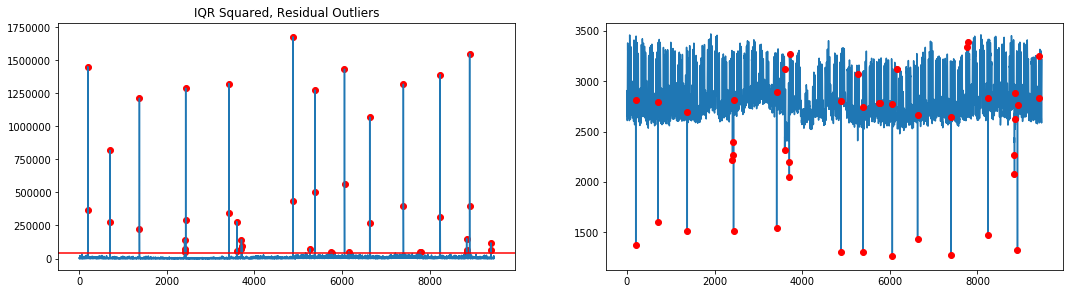

In [57]:
twenty_fifth = np.percentile(resids_squared, 25)
seventy_fifth = np.percentile(resids_squared, 75)
iqr = seventy_fifth - twenty_fifth
iqr_bound = seventy_fifth + (5 * iqr)
plt.figure(figsize = (18, 10))
plt.subplot(2, 2, 1)
plt.plot(resids_squared.index, resids_squared.values)
plt.axhline(y = iqr_bound, color = 'red')

index_outliers = [i for i in range(len(resids_squared)) if resids_squared.values.tolist()[i] >
                  iqr_bound]
resid_outliers = resids_squared.iloc[index_outliers]
plt.scatter(resid_outliers.index, resid_outliers.values, color = 'red')
plt.title("IQR Squared, Residual Outliers")

plt.subplot(2, 2, 2)
actual = df.Actual
plt.plot(actual.index, actual.values, zorder=1)
actual_outliers = actual.iloc[index_outliers]
plt.scatter(actual_outliers.index, actual_outliers.values, color = 'red', zorder=2)


# IQR + Absolute Value

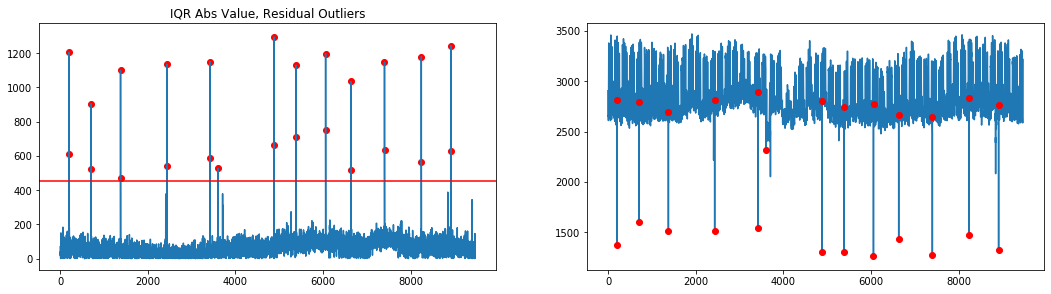

In [8]:
resids = df.Result
resids = abs(resids)
plt.figure(figsize = (18, 10))
plt.subplot(2, 2, 1)
plt.plot(resids.index, resids.values)
twenty_fifth = np.percentile(resids, 25)
seventy_fifth = np.percentile(resids, 75)
iqr = seventy_fifth - twenty_fifth
iqr_bound = seventy_fifth + (6 * iqr)
plt.axhline(y = iqr_bound, color = 'red')
index_outliers = [i for i in range(len(resids)) if resids.values.tolist()[i] > iqr_bound]
resid_outliers = resids.iloc[index_outliers]
plt.scatter(resid_outliers.index, resid_outliers.values, color = 'red')
plt.title("IQR Abs Value, Residual Outliers")


plt.subplot(2, 2, 2)
actual = df.Actual
plt.plot(actual.index, actual.values, zorder=1)
actual_outliers = actual.iloc[index_outliers]
plt.scatter(actual_outliers.index, actual_outliers.values, color = 'red', zorder=2)
